In [ ]:
import pandas as pd

# Read the CSV file
input_file = r'F:\data - Copy\ahmed\new\4.csv'
output_file = r'F:\data - Copy\ahmed\new\a3.csv'

# Define the range of rows and columns you want to extract
start_row = 6000  # Starting row index (0-based)
end_row = start_row+4000  # Ending row index (exclusive)
start_col = 0  # Starting column index (0-based)
end_col = 1   # Ending column index (exclusive)

# Load the CSV into a DataFrame
df = pd.read_csv(input_file)

# Extract the specified range of rows and columns
df_range = df.iloc[start_row:end_row, start_col:end_col]

# Save the extracted range to a new CSV file
df_range.to_csv(output_file, index=False)

print(f'Extracted range saved to {output_file}')


In [ ]:
import pandas as pd

# List of CSV file paths
file_paths = [r'F:\data - Copy\ahmed\new\a0.csv',r'F:\data - Copy\ahmed\new\a1.csv',r'F:\data - Copy\ahmed\new\a2.csv',r'F:\data - Copy\ahmed\new\a3.csv']

# Read each CSV file into a DataFrame
dfs = [pd.read_csv(file) for file in file_paths]

# Concatenate the DataFrames along the columns (axis=1)
combined_df = pd.concat(dfs, axis=1)

# Save the resulting DataFrame to a new CSV file
combined_df.to_csv(r'F:\data - Copy\ahmed\new\d.csv', index=False)

print("Files combined successfully!")


In [ ]:
import pandas as pd

# List of CSV file paths
file_paths = [r'F:\data - Copy\ahmed\new\a.csv',r'F:\data - Copy\ahmed\new\b.csv',r'F:\data - Copy\ahmed\new\c.csv',r'F:\data - Copy\ahmed\new\d.csv',r'F:\data - Copy\ahmed\new\e.csv']

# Read each CSV file into a DataFrame
dfs = [pd.read_csv(file) for file in file_paths]

# Concatenate the DataFrames along the columns (axis=1)
combined_df = pd.concat(dfs, axis=1)

# Save the resulting DataFrame to a new CSV file
combined_df.to_csv(r'F:\data - Copy\ahmed\new\n.csv', index=False)

print("Files combined successfully!")


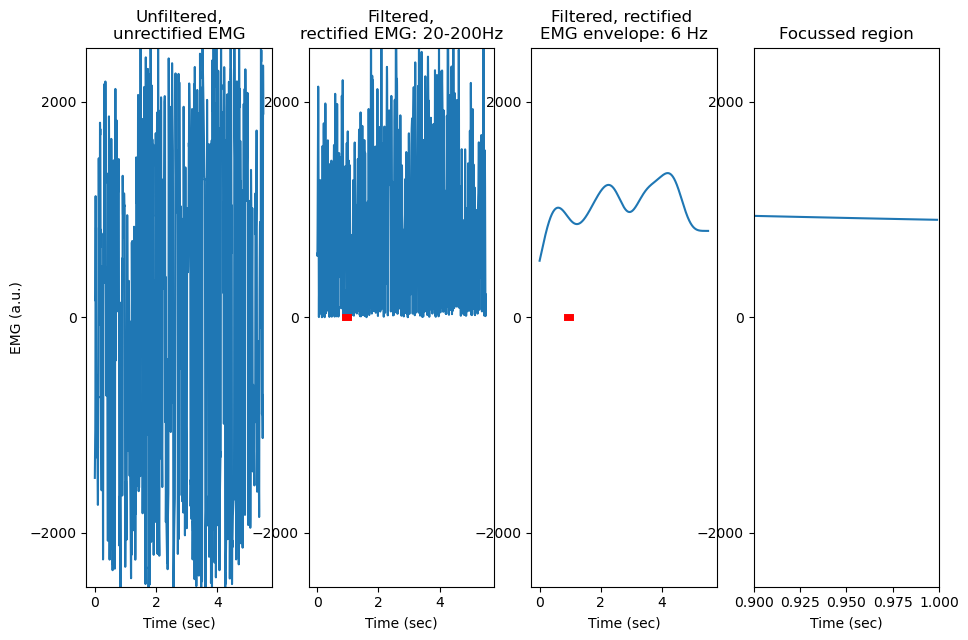

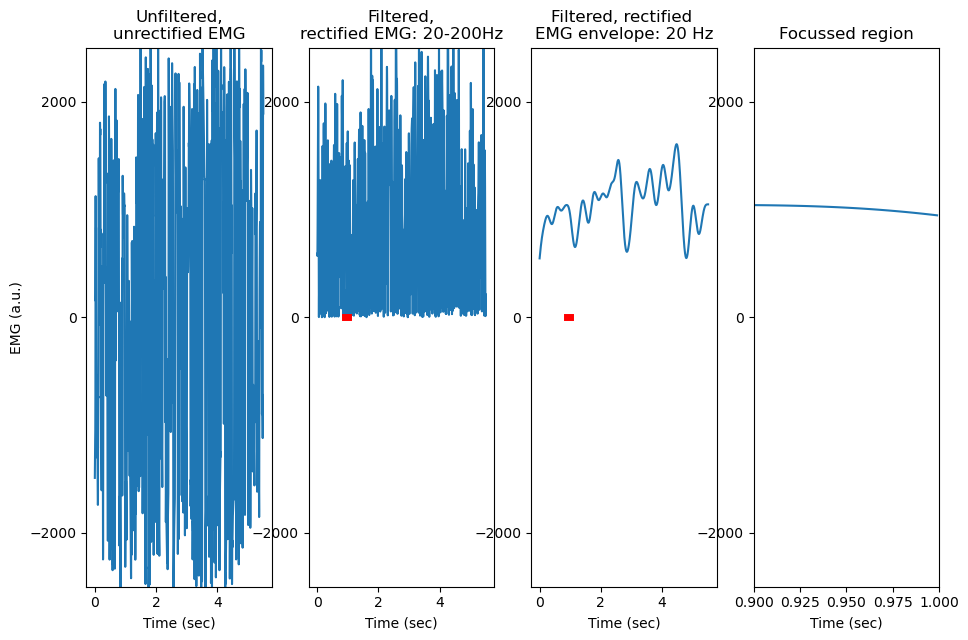

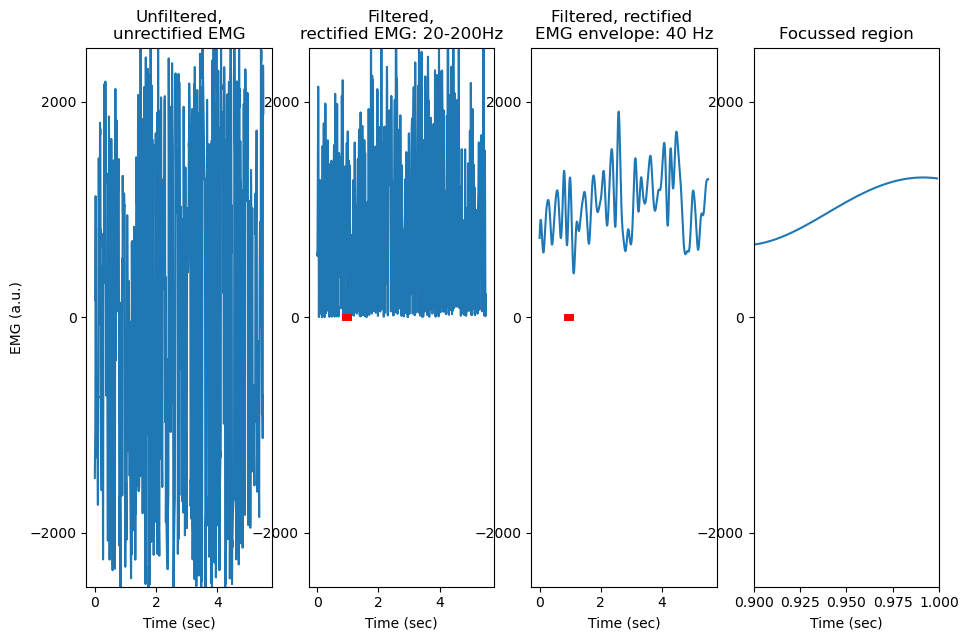

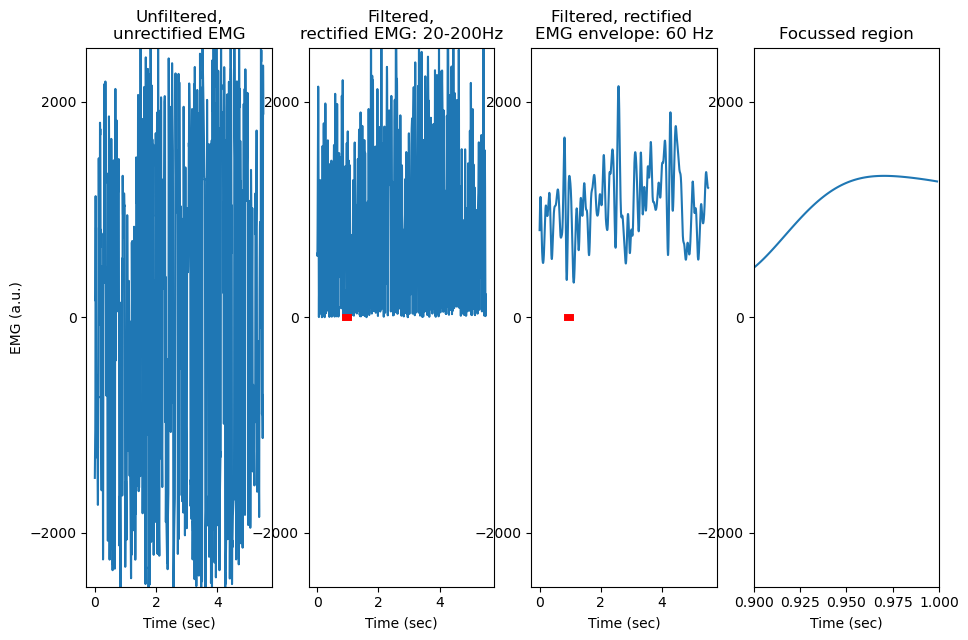

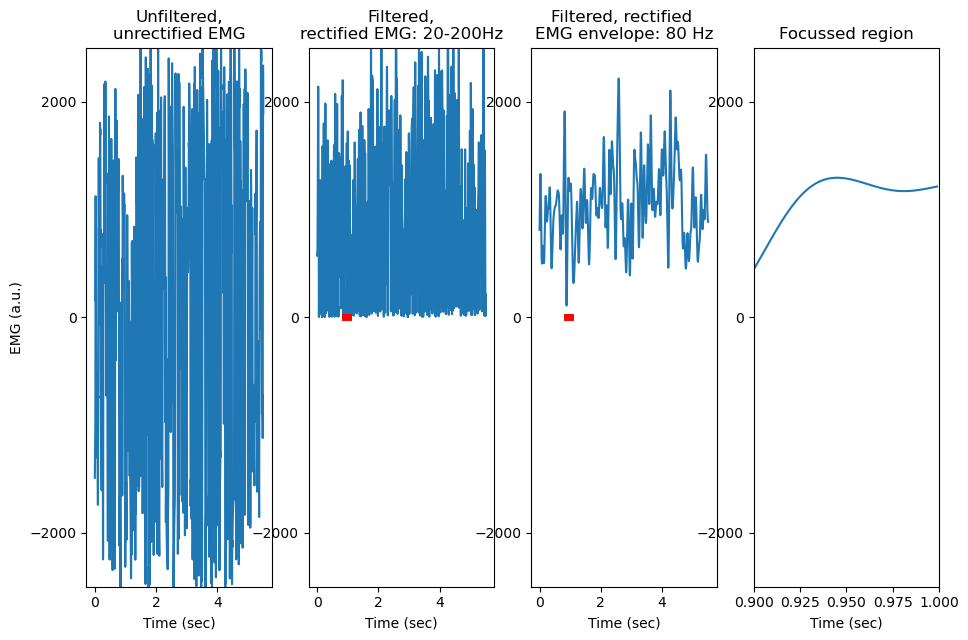

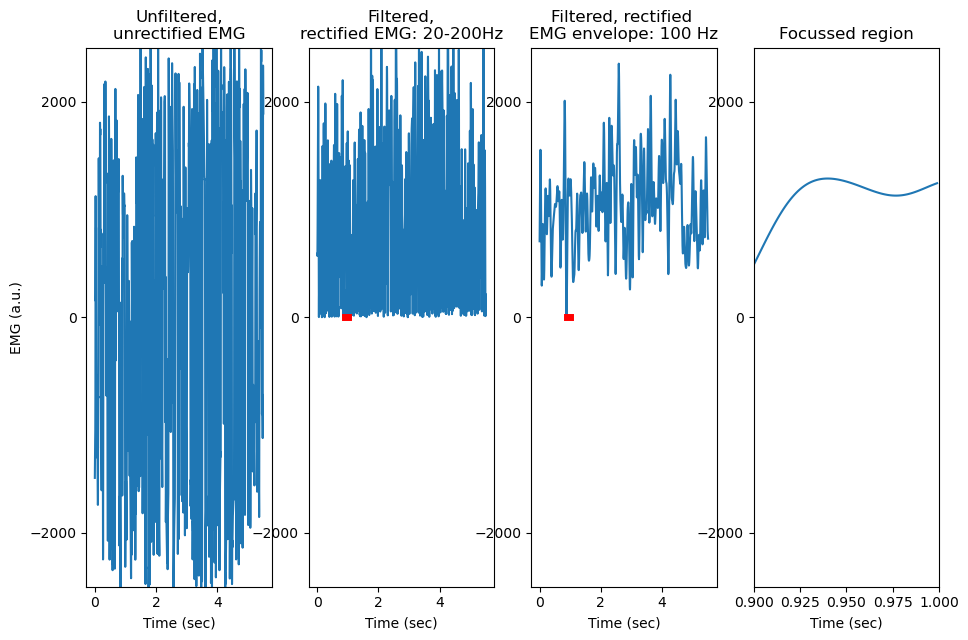

In [15]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
 # Read the CSV file
df = pd.read_csv(r'F:\ahmed\1\data\0.csv')
   # Select all columns except the last one as features
emg = df.iloc[:, 0].values  # assuming the EMG signal is in the first column
# Create a time vector
time = np.array([i / 1000 for i in range(0, len(emg), 1)])  # sampling rate 1000 Hz
   # Correct the mean
emg_correctmean = emg - np.mean(emg)
def filteremg(time, emg, low_pass=10, sfreq=3500, high_band=10, low_band=100):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    
  

    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/(sfreq/2)
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    # plot graphs
    fig = plt.figure()
    plt.subplot(1, 4, 1)
    plt.subplot(1, 4, 1).set_title('Unfiltered,' + '\n' + 'unrectified EMG')
    plt.plot(time, emg)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-2500, 2500)
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')
    
    plt.subplot(1, 4, 2)
    plt.subplot(1, 4, 2).set_title('Filtered,' + '\n' + 'rectified EMG: ' + str(int(high_band*sfreq)) + '-' + str(int(low_band*sfreq)) + 'Hz')
    plt.plot(time, emg_rectified)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-2500, 2500)
    plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')

    plt.subplot(1, 4, 3)
    plt.subplot(1, 4, 3).set_title('Filtered, rectified ' + '\n' + 'EMG envelope: ' + str(int(low_pass*sfreq)) + ' Hz')
    plt.plot(time, emg_envelope)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-2500, 2500)
    plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')
    
    plt.subplot(1, 4, 4)
    plt.subplot(1, 4, 4).set_title('Focussed region')
    plt.plot(time[int(0.9*1000):int(1.0*1000)], emg_envelope[int(0.9*1000):int(1.0*1000)])
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.xlim(0.9, 1.0)
    plt.ylim(-2500, 2500)
    plt.xlabel('Time (sec)')

    fig_name = 'fig_' + str(int(low_pass*sfreq)) + '.png'
    fig.set_size_inches(w=11,h=7)
    fig.savefig(fig_name)


for i in [3,10,20,30,40,50]:
    filteremg(time, emg_correctmean, low_pass=i)

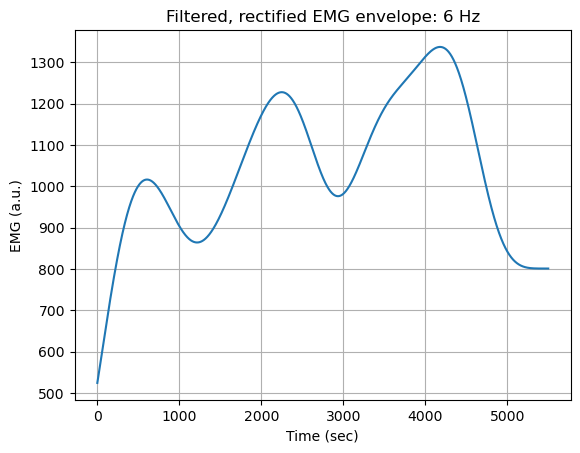

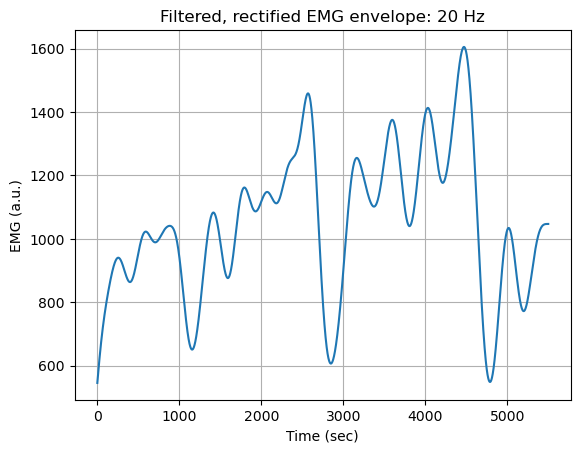

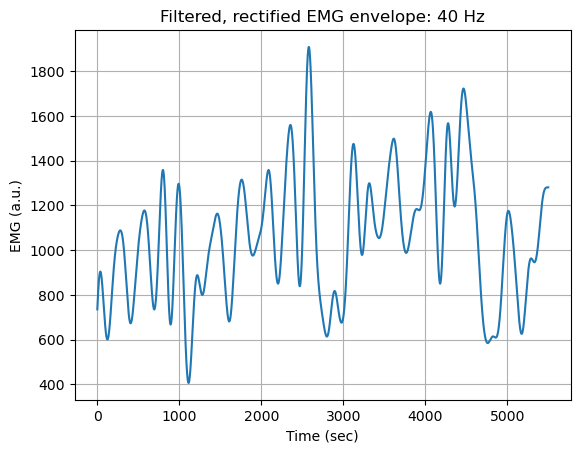

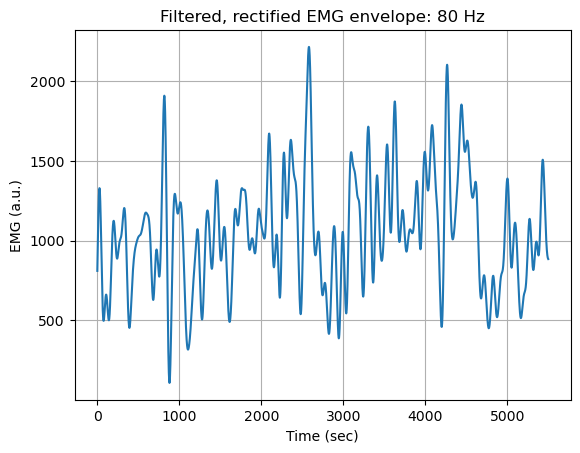

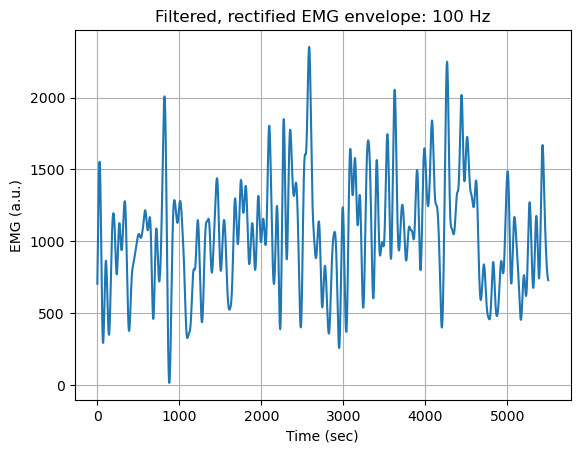

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
df = pd.read_csv(r'F:\ahmed\1\data\0.csv')
emg = df.iloc[:, 0].values  # assuming the EMG signal is in the first column
emg_correctmean = emg - np.mean(emg)
time = np.array([i  for i in range(0, len(emg), 1)])  # sampling rate 1000 Hz
def filteremg(time, emg, low_pass=10, sfreq=3500, high_band=10, low_band=100):
    """
    Filter and rectify EMG signal to obtain the EMG envelope.
    
    time: Time data
    emg: EMG data
    low_pass: low-pass cut-off frequency
    sfreq: sampling frequency
    high_band: high-pass cut off frequency for bandpass
    low_band: low-pass cut off frequency for bandpass
    """
    
    # Normalize cut-off frequencies to sampling frequency
    high_band = high_band / (sfreq / 2)
    low_band = low_band / (sfreq / 2)
    
    # Create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band, low_band], btype='bandpass')
    
    # Filter EMG signal
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # Rectify EMG signal
    emg_rectified = np.abs(emg_filtered)
    
    # Create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass / (sfreq / 2)
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    # Plot rectified EMG envelope
    plt.figure()
    plt.title(f'Filtered, rectified EMG envelope: {int(low_pass * sfreq)} Hz')
    plt.plot(time, emg_envelope)
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming `time` and `emg_correctmean` are defined
for i in [3, 10, 20, 40, 50]:
    filteremg(time, emg_correctmean, low_pass=i)


In [41]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import signal

df = pd.read_csv(r'F:\ahmed\1\data\0.csv')
emg = df.iloc[:, 0].values  # assuming the EMG signal is in the first column
emg_correctmean = emg - np.mean(emg)
time = np.array([i / 3500 for i in range(0, len(emg), 1)])  # sampling rate 3500 Hz

def filteremg(time, emg, low_pass=10, sfreq=3500, high_band=10, low_band=100):
    """
    Filter and rectify EMG signal to obtain the EMG envelope.
    
    time: Time data
    emg: EMG data
    low_pass: low-pass cut-off frequency
    sfreq: sampling frequency
    high_band: high-pass cut off frequency for bandpass
    low_band: low-pass cut off frequency for bandpass
    """
    
    # Normalize cut-off frequencies to sampling frequency
    high_band = high_band / (sfreq / 2)
    low_band = low_band / (sfreq / 2)
    
    # Create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band, low_band], btype='bandpass')
    
    # Filter EMG signal
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # Rectify EMG signal
    emg_rectified = np.abs(emg_filtered)
    
    # Create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass / (sfreq / 2)
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    return emg_envelope

# Example usage:
# Assuming `time` and `emg_correctmean` are defined
for i in [3, 10, 20, 30,40,50]:
    emg_envelope = filteremg(time, emg_correctmean, low_pass=i)
    # Save to CSV file
    df_envelope = pd.DataFrame({'Time': time, f'EMG_Envelope_{i}Hz': emg_envelope})
    df_envelope.to_csv(f'emg_envelope_{i}Hz.csv', index=False)


In [3]:
import os
import numpy as np
import pandas as pd
import scipy as sp
from scipy import signal

def filteremg(time, emg, low_pass=10, sfreq=3500, high_band=10, low_band=100):
    """
    Filter and rectify EMG signal to obtain the EMG envelope.
    
    time: Time data
    emg: EMG data
    low_pass: low-pass cut-off frequency
    sfreq: sampling frequency
    high_band: high-pass cut off frequency for bandpass
    low_band: low-pass cut off frequency for bandpass
    """
    
    # Normalize cut-off frequencies to sampling frequency
    high_band = high_band / (sfreq / 2)
    low_band = low_band / (sfreq / 2)
    
    # Create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band, low_band], btype='bandpass')
    
    # Filter EMG signal
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # Rectify EMG signal
    emg_rectified = np.abs(emg_filtered)
    
    # Create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass / (sfreq / 2)
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    return emg_envelope

# Define the input and output directories
input_dir = r'F:\f_bi\a\2'
output_dir = r'F:\f_bi\a\2'

# Make sure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each file in the input directory
for file_name in os.listdir(input_dir):
    if file_name.endswith('.csv'):
        # Read the data
        df = pd.read_csv(os.path.join(input_dir, file_name))
        
        # Process each column individually
        for col in df.columns:
            emg = df[col].values
            emg_correctmean = emg - np.mean(emg)
            time = np.array([i / 3500 for i in range(len(emg))])  # sampling rate 3500 Hz

            # Process and save filtered EMG data
            for low_pass in [3, 10, 20, 30, 40, 50]:
                emg_envelope = filteremg(time, emg_correctmean, low_pass=low_pass)
                df_envelope = pd.DataFrame({f'EMG_Envelope_{low_pass}Hz': emg_envelope})
                output_file_name = f'{os.path.splitext(file_name)[0]}_{col}_emg_envelope_{low_pass}Hz.csv'
                df_envelope.to_csv(os.path.join(output_dir, output_file_name), index=False)


In [81]:
import os
import numpy as np
import pandas as pd
import scipy as sp
from scipy import signal

def filteremg(time, emg, low_pass=10, sfreq=3500, high_band=10, low_band=100):
    """
    Filter and rectify EMG signal to obtain the EMG envelope.
    
    time: Time data
    emg: EMG data
    low_pass: low-pass cut-off frequency
    sfreq: sampling frequency
    high_band: high-pass cut off frequency for bandpass
    low_band: low-pass cut off frequency for bandpass
    """
    
    # Normalize cut-off frequencies to sampling frequency
    high_band = high_band / (sfreq / 2)
    low_band = low_band / (sfreq / 2)
    
    # Create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band, low_band], btype='bandpass')
    
    # Filter EMG signal
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # Rectify EMG signal
    emg_rectified = np.abs(emg_filtered)
    
    # Create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass / (sfreq / 2)
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    return emg_envelope

# Define the input and output directories
input_dir = r'F:\ahmed\n\data'
output_dir = r'F:\ahmed\n\xhz'

# Make sure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each file in the input directory
for file_name in os.listdir(input_dir):
    if file_name.endswith('.csv'):
        # Read the EMG data
        df = pd.read_csv(os.path.join(input_dir, file_name))
        emg = df.iloc[:, 0].values  # assuming the EMG signal is in the first column
        emg_correctmean = emg - np.mean(emg)
        time = np.array([i / 3500 for i in range(len(emg))])  # sampling rate 3500 Hz

        # Process and save filtered EMG data
        for low_pass in [3, 10, 20, 30, 40, 50]:
            emg_envelope = filteremg(time, emg_correctmean, low_pass=low_pass)
            df_envelope = pd.DataFrame({f'EMG_Envelope_{low_pass}Hz': emg_envelope})
            output_file_name = f'{os.path.splitext(file_name)[0]}_emg_envelope_{low_pass}Hz.csv'
            df_envelope.to_csv(os.path.join(output_dir, output_file_name), index=False)


In [11]:
import os
import pandas as pd

def combine_csv_files(directory, output_file):
    # List to hold DataFrames
    df_list = []
    
    # Iterate over files in the specified directory
    for filename in os.listdir(directory):
        # Check if the file is a CSV and ends with '3HZ.csv'
        if filename.endswith('3Hz.csv'):
            file_path = os.path.join(directory, filename)
            # Read CSV file and append DataFrame to the list
            df = pd.read_csv(file_path)
            df = df.T
            df_list.append(df)
    
    # Concatenate all DataFrames in the list
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Write the combined DataFrame to a new CSV file
    combined_df.to_csv(output_file, index=False)
    print(f'Combined CSV saved to {output_file}')

# Example usage
directory_path = r'F:\f_bi\a\2'  # Replace with your directory path
output_csv = r'F:\f_bi\a\combined_3HZ_files.csv'       # Replace with your desired output file name
combine_csv_files(directory_path, output_csv)


Combined CSV saved to F:\f_bi\a\combined_3HZ_files.csv


In [145]:
import os
import pandas as pd

def combine_csv_files(directory, output_file):
    # List to hold DataFrames
    df_list = []
    
    # Iterate over files in the specified directory
    for filename in os.listdir(directory):
        # Check if the file is a CSV and ends with '3HZ.csv'
        if filename.endswith('10Hz.csv'):
            file_path = os.path.join(directory, filename)
            # Read CSV file and append DataFrame to the list
            df = pd.read_csv(file_path)
            df = df.T
            df_list.append(df)
    
    # Concatenate all DataFrames in the list
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Write the combined DataFrame to a new CSV file
    combined_df.to_csv(output_file, index=False)
    print(f'Combined CSV saved to {output_file}')

# Example usage
directory_path = r'F:\ahmed\n\xhz'  # Replace with your directory path
output_csv = r'F:\ahmed\n\combined_10HZ_files.csv'       # Replace with your desired output file name
combine_csv_files(directory_path, output_csv)


Combined CSV saved to F:\ahmed\n\combined_10HZ_files.csv


In [147]:
import os
import pandas as pd

def combine_csv_files(directory, output_file):
    # List to hold DataFrames
    df_list = []
    
    # Iterate over files in the specified directory
    for filename in os.listdir(directory):
        # Check if the file is a CSV and ends with '3HZ.csv'
        if filename.endswith('20Hz.csv'):
            file_path = os.path.join(directory, filename)
            # Read CSV file and append DataFrame to the list
            df = pd.read_csv(file_path)
            df = df.T
            df_list.append(df)
    
    # Concatenate all DataFrames in the list
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Write the combined DataFrame to a new CSV file
    combined_df.to_csv(output_file, index=False)
    print(f'Combined CSV saved to {output_file}')

# Example usage
directory_path = r'F:\ahmed\n\xhz'  # Replace with your directory path
output_csv = r'F:\ahmed\n\combined_20HZ_files.csv'       # Replace with your desired output file name
combine_csv_files(directory_path, output_csv)


Combined CSV saved to F:\ahmed\n\combined_20HZ_files.csv


In [149]:
import os
import pandas as pd

def combine_csv_files(directory, output_file):
    # List to hold DataFrames
    df_list = []
    
    # Iterate over files in the specified directory
    for filename in os.listdir(directory):
        # Check if the file is a CSV and ends with '3HZ.csv'
        if filename.endswith('30Hz.csv'):
            file_path = os.path.join(directory, filename)
            # Read CSV file and append DataFrame to the list
            df = pd.read_csv(file_path)
            df = df.T
            df_list.append(df)
    
    # Concatenate all DataFrames in the list
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Write the combined DataFrame to a new CSV file
    combined_df.to_csv(output_file, index=False)
    print(f'Combined CSV saved to {output_file}')

# Example usage
directory_path = r'F:\ahmed\n\xhz'  # Replace with your directory path
output_csv = r'F:\ahmed\n\combined_30HZ_files.csv'       # Replace with your desired output file name
combine_csv_files(directory_path, output_csv)


Combined CSV saved to F:\ahmed\n\combined_30HZ_files.csv


In [151]:
import os
import pandas as pd

def combine_csv_files(directory, output_file):
    # List to hold DataFrames
    df_list = []
    
    # Iterate over files in the specified directory
    for filename in os.listdir(directory):
        # Check if the file is a CSV and ends with '3HZ.csv'
        if filename.endswith('40Hz.csv'):
            file_path = os.path.join(directory, filename)
            # Read CSV file and append DataFrame to the list
            df = pd.read_csv(file_path)
            df = df.T
            df_list.append(df)
    
    # Concatenate all DataFrames in the list
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Write the combined DataFrame to a new CSV file
    combined_df.to_csv(output_file, index=False)
    print(f'Combined CSV saved to {output_file}')

# Example usage
directory_path = r'F:\ahmed\n\xhz'  # Replace with your directory path
output_csv = r'F:\ahmed\n\combined_40HZ_files.csv'       # Replace with your desired output file name
combine_csv_files(directory_path, output_csv)


Combined CSV saved to F:\ahmed\n\combined_40HZ_files.csv


In [153]:
import os
import pandas as pd

def combine_csv_files(directory, output_file):
    # List to hold DataFrames
    df_list = []
    
    # Iterate over files in the specified directory
    for filename in os.listdir(directory):
        # Check if the file is a CSV and ends with '3HZ.csv'
        if filename.endswith('50Hz.csv'):
            file_path = os.path.join(directory, filename)
            # Read CSV file and append DataFrame to the list
            df = pd.read_csv(file_path)
            df = df.T
            df_list.append(df)
    
    # Concatenate all DataFrames in the list
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Write the combined DataFrame to a new CSV file
    combined_df.to_csv(output_file, index=False)
    print(f'Combined CSV saved to {output_file}')

# Example usage
directory_path = r'F:\ahmed\n\xhz'  # Replace with your directory path
output_csv = r'F:\ahmed\n\combined_50HZ_files.csv'       # Replace with your desired output file name
combine_csv_files(directory_path, output_csv)


Combined CSV saved to F:\ahmed\n\combined_50HZ_files.csv


In [66]:
import numpy as np
import pandas as pd

# Assuming X is your feature matrix with shape (470, 34168)
# Load your dataset
# Example: X = np.random.rand(470, 34168)  # Replace this with your actual data loading method
input_file = r'F:\ahmed\hz\50hz\6combined_50HZ_files.csv'  # Replace with your input CSV file path
X = pd.read_csv(input_file) 
# Calculate the absolute values of the signal
abs_signal = np.abs(X)
# Compute the mean of the absolute values
mav = np.mean(abs_signal, axis=1)
# Convert the result to a DataFrame
result_df = pd.DataFrame(mav, columns=['MAV'])

# Save the DataFrame to a CSV file
result_df.to_csv(r'F:\ahmed\hz\50hz\6MAV_50HZ.csv', index=False)

print("Mean square values saved to mean_square_output.csv")


Mean square values saved to mean_square_output.csv


In [242]:
import numpy as np
import pandas as pd
import math

# Function that calculates Root Mean Square 
def rmsValue(arr, n):
    square = 0
    mean = 0.0
    root = 0.0
    
    # Calculate square
    for i in range(0, n):
        square += (arr[i] ** 2)
    
    # Calculate Mean 
    mean = square / float(n)
    
    # Calculate Root
    root = math.sqrt(mean)
    
    return root

# Driver code
if __name__ == '__main__':
    input_file = r'F:\ahmed\hz\3hz\1combined_3HZ_files.csv'  # Replace with your input CSV file path
    data = pd.read_csv(input_file)
    arr = data.iloc[2, :]  # Use the first column of the CSV file
    n = len(arr)
    print(rmsValue(arr, n))

# This code is contributed by Shashank_Sharma


965.5834546533417


C:\Users\ahmed\AppData\Local\Temp\ipykernel_20308\2131570154.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  square += (arr[i] ** 2)


In [290]:
import numpy as np
import pandas as pd
import numpy
# Assuming X is your feature matrix with shape (470, 34168)
# Load your dataset
# Example: X = np.random.rand(470, 34168)  # Replace this with your actual data loading method
input_file = r'F:\ahmed\hz\3hz\5combined_3HZ_files.csv'  # Replace with your input CSV file path
data = pd.read_csv(input_file) 
speed=data.iloc[0, :]
x = numpy.std(speed)
print(x)



106.16286265497706


In [86]:
#Python3 program to calculate Root Mean Square 
import numpy as np
import pandas as pd
import math

# Function to calculate Root Mean Square for a single row
def rmsValue(row):
    square = np.square(row)
    mean = np.mean(square)
    root = np.sqrt(mean)
    return root

# Driver code
if __name__ == '__main__':
    input_file = r'F:\ahmed\hz\50hz\6combined_50HZ_files.csv'  # Replace with your input CSV file path
    data = pd.read_csv(input_file)
    
    # Calculate RMS for each row
    rms_values = data.apply(rmsValue, axis=1)
    
    # Print RMS values for each row
#This code is contributed by Shashank_Sharma
rms_values.to_csv(r'F:\ahmed\hz\50hz\6RMS_50HZ.csv', index=False)

In [148]:
import numpy as np
import pandas as pd

# Assuming X is your feature matrix with shape (470, 34168)
# Load your dataset
# Example: X = np.random.rand(470, 34168)  # Replace this with your actual data loading method
input_file = r'F:\ahmed\hz\50hz\6combined_50HZ_files.csv'  # Replace with your input CSV file path
X = pd.read_csv(input_file) 
# Calculate the absolute values of 
# Compute the mean of the absolute values
var = np.std(X, axis=1)
# Convert the result to a DataFrame
result_df = pd.DataFrame(var, columns=['std'])

# Save the DataFrame to a CSV file
result_df.to_csv(r'F:\ahmed\hz\50hz\6std_50HZ.csv', index=False)

print("Mean square values saved to mean_square_output.csv")


Mean square values saved to mean_square_output.csv


In [126]:
import numpy as np
import pandas as pd

# Assuming X is your feature matrix with shape (470, 34168)
# Load your dataset
# Example: X = np.random.rand(470, 34168)  # Replace this with your actual data loading method
input_file = r'F:\ahmed\hz\50hz\6combined_50HZ_files.csv'  # Replace with your input CSV file path
X = pd.read_csv(input_file) 
# Calculate the absolute values of 
# Compute the mean of the absolute values
var = np.var(X, axis=1)
# Convert the result to a DataFrame
result_df = pd.DataFrame(var, columns=['var'])

# Save the DataFrame to a CSV file
result_df.to_csv(r'F:\ahmed\hz\50hz\6var_50HZ.csv', index=False)

print("Mean square values saved to mean_square_output.csv")


Mean square values saved to mean_square_output.csv


In [196]:
import pandas as pd

def calculate_ssi(emg_data):
    # Calculate the Simple Square Integral (SSI)
    ssi = sum(emg_data ** 2)
    return ssi

# Load the CSV file
file_path = r'F:\ahmed\hz\50hz\6combined_50HZ_files.csv'
data = pd.read_csv(file_path)
 # Calculate RMS for each row
ssi_values = data.apply(calculate_ssi, axis=1)
result_df = pd.DataFrame(ssi_values, columns=['ssi'])

# Save the DataFrame to a CSV file
result_df.to_csv(r'F:\ahmed\hz\50hz\6ssi_50HZ.csv', index=False)

print("ssi saved to mean_square_output.csv")


ssi saved to mean_square_output.csv


In [6]:
import pandas as pd

def calculate_ssi(emg_data):
    # Calculate the Simple Square Integral (SSI)
    ssi = sum(emg_data ** 2)
    return ssi

# Load the CSV file
file_path = r'F:\ahmed\hz\3hz\6combined_3HZ_files.csv'
data = pd.read_csv(file_path)

# Extract the EMG data from the first column
emg_data = data.iloc[0, :]

# Calculate SSI
ssi_value = calculate_ssi(emg_data)

print(f'Simple Square Integral (SSI) of EMG data: {ssi_value}')


Simple Square Integral (SSI) of EMG data: 2586580145.026935


In [184]:
import os
import pandas as pd

def combine_csv_files(directory, output_file):
    # List to hold DataFrames
    df_list = []
    
    # Iterate over files in the specified directory
    for filename in os.listdir(directory):
        # Check if the file is a CSV and ends with '3HZ.csv'
        if filename.endswith('RMS_50HZ.csv'):
            file_path = os.path.join(directory, filename)
            # Read CSV file and append DataFrame to the list
            df = pd.read_csv(file_path)
            df = df.T
            df_list.append(df)
    # Concatenate all DataFrames in the list
    combined_df = pd.concat(df_list, ignore_index=True)
    combined_df=combined_df.T
    # Write the combined DataFrame to a new CSV file
    combined_df.to_csv(output_file, index=False)
    print(f'Combined CSV saved to {output_file}')

# Example usage
directory_path = r'F:\ahmed\hz\50hz'  # Replace with your directory path
output_csv = r'F:\ahmed\hz\50hz\50RMS.CSV'       # Replace with your desired output file name
combine_csv_files(directory_path, output_csv)


Combined CSV saved to F:\ahmed\hz\50hz\50RMS.CSV


In [10]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
df = pd.read_csv(r'F:\f_bi\21.csv')

# Select all columns except the last one as features
X = df.iloc[:, :-1]

# Select the last column as the target
y = df.iloc[:, -1]

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=47)

# Initialize StratifiedKFold with 10 splits
sk_folds = StratifiedKFold(n_splits=2)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=sk_folds)

# Print the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.304 0.224]
Average CV Score:  0.264
Number of CV Scores used in Average:  2


In [11]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
df = pd.read_csv(r'F:\f_bi\a\MAVcombined_3HZ_files.csv')

# Select all columns except the last one as features
X = df.iloc[:, :-1]

# Select the last column as the target
y = df.iloc[:, -1]

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=1)

# Initialize StratifiedKFold with 10 splits
sk_folds = StratifiedKFold(n_splits=4)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=sk_folds)

# Print the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.33333333 0.         0.         0.        ]
Average CV Score:  0.08333333333333333
Number of CV Scores used in Average:  4


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
df = pd.read_csv(r'F:\ahmed\hz\3hz\ssi_3HZ.CSV')

# Select all columns except the last one as features
X = df.iloc[:, :-1]
# Select the last column as the target
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = SVC(kernel ='linear')
classifier.fit(X_train, y_train) # training set in x, y axis
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score, StratifiedKFold
from scipy.stats import randint

# Load dataset
df = pd.read_csv(r'F:\ahmed\hz\3hz\ssi_3HZ.csv')

# Select all columns except the last one as features
X = df.iloc[:, :-1]
# Select the last column as the target
y = df.iloc[:, -1]
# Create a Random Forest Classifier
rf = RandomForestClassifier()
# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=47)
# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [0.44444444 0.40740741 0.62962963 0.48148148 0.53846154 0.53846154
 0.61538462 0.65384615 0.42307692 0.5       ]
Mean accuracy: 0.5232193732193732


Cross-validation scores: [0.52830189 0.43396226 0.50943396 0.46153846 0.40384615]
Mean accuracy: 0.46741654571843255
Accuracy: 0.41509433962264153


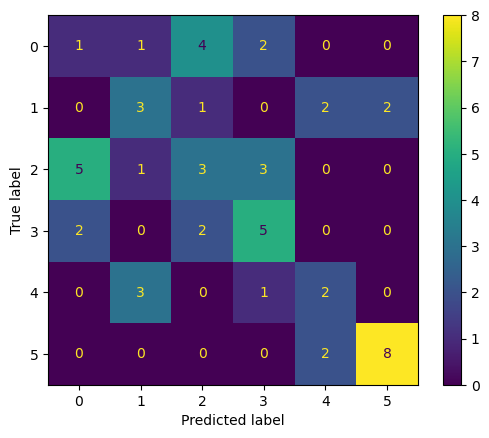

In [5]:
# Data Processing
import pandas as pd
import numpy as np
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
df = pd.read_csv(r'F:\ahmed\hz\3hz\MAV_3HZ.csv')
# Select all columns except the last one as features
X = df.iloc[:, :-1]
# Select the last column as the target
y = df.iloc[:, -1]
# Create a Random Forest Regressor
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.model_selection import cross_val_score, StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Use StratifiedKFold for preserving the percentage of samples for each class
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# Evaluate the model with cross-validation
scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
# Print the accuracy for each fold
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv(r'F:\ahmed\hz\3hz\ssi_3HZ.CSV')
# Select all columns except the last one as features
X = df.iloc[:, :-1]
# Select the last column as the target
y = df.iloc[:, -1]
regressor = RandomForestRegressor(n_estimators=65, random_state=10, oob_score=True)
regressor.fit(X, y)
predictions = regressor.predict(X)
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

R-squared: 0.9027990471067394


Number of input features: 30
Input features Names  : ['var/3hz' 'MAV/3hz' 'ssi/3hz' 'RMS/3hz' 'std/3hz' 'var/10hz' 'MAV/10hz'
 'ssi/10hz' 'RMS/10hz' 'std/10hz' 'var/20hz' 'MAV/20hz' 'ssi/20hz'
 'RMS/20hz' 'std/20hz' 'var/30hz' 'RMS/30hz' 'ssi/30hz' 'MAV/30hz'
 'std/30hz' 'var/40hz' 'MAV/40hz' 'ssi/40hz' 'RMS/40hz' 'std/40hz'
 'MAV/50hz' 'var/50hz' 'ssi/50hz' 'RMS/50hz' 'std/50hz']
Input features scores : [ 12.1470903  117.94868318 176.19804758 121.65712188  15.66854505
  28.66073298 123.36928048 182.2993646  126.76894128  30.94450991
  37.13747507 123.24176889 194.57460754 128.97760051  40.81211425
  47.25326111 131.44782287 199.13590579 122.19511206  53.95209642
  54.99882794 123.59530818 206.13178821 131.64326857  60.19957354
 121.49763828  45.17841073 204.59902485 131.51811666  47.53479386]
Input features pvalues: [2.56207884e-10 2.45297210e-58 3.53295532e-72 2.33406628e-59
 4.69913746e-13 5.43043652e-22 8.02122488e-60 2.08440433e-73
 9.93662294e-61 2.12382611e-23 5.18754095e-27 8.6

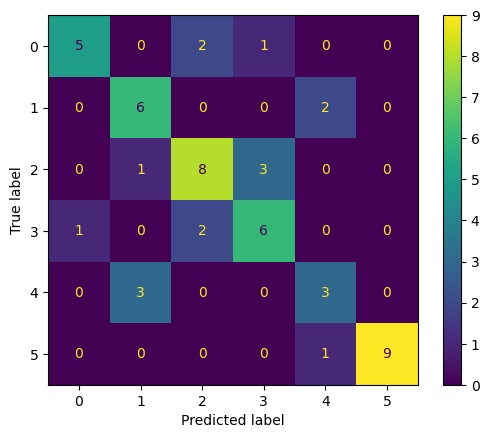

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.metrics import accuracy_score 
# Read the CSV file
df = pd.read_csv(r'F:\ahmed\hz\3hz\var_3HZ - Copy.csv')
# Select all columns except the last one as features
X = df.iloc[:, 0:30]
# Select the last column as the target
y = df.iloc[:, 30]
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Apply SelectKBest with chi2
selector = SelectKBest(f_classif, k=10) 
selector.fit(X_train, y_train) 
print('Number of input features:', selector.n_features_in_) 
print('Input features Names  :', selector.feature_names_in_) 
print('Input features scores :', selector.scores_) 
print('Input features pvalues:', selector.pvalues_) 
print('Output features Names :', selector.get_feature_names_out())
X_train_selected = selector.transform(X_train) 
X_test_selected = selector.transform(X_test)
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)
gnb = GaussianNB()
# Train the classifier
gnb.fit(X_train_selected, y_train)

# Calculate and print the accuracy of the model
accuracy = gnb.score(X_test_selected, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

# Example prediction
# Assuming you want to predict for a new sample with the same number of features as in X
# Replace the following line with actual data for prediction
y_pred = gnb.predict(X_test_selected)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Gaussian Naive Bayes model accuracy(in %): 72.72727272727273


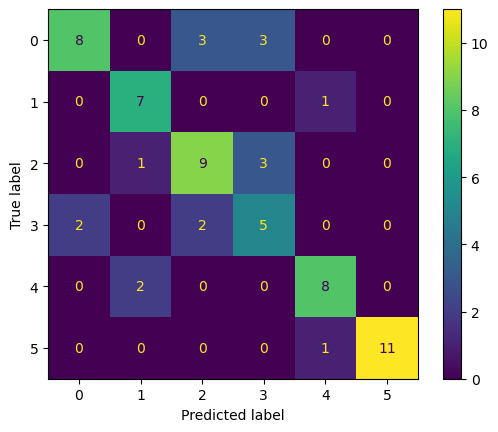

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.metrics import accuracy_score 
# Read the CSV file
df = pd.read_csv(r'F:\ahmed\hz\3hz\var_3HZ - Copy.csv')
# Select all columns except the last one as features
X = df.iloc[:, 0:30]
# Select the last column as the target
y = df.iloc[:, 30]
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# Apply SelectKBest with chi2
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Average Random Forest model accuracy (in %): 68.56060606060606


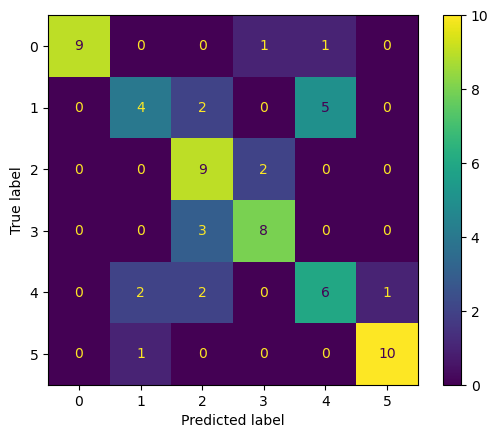

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Read the CSV file
df = pd.read_csv(r'F:\ahmed\hz\3hz\var_3HZ - Copy.csv')

# Select all columns from 10 to 25 as features
X = df.iloc[:, 0:30]

# Select the 30th column as the target
y = df.iloc[:, 30]

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=47, random_state=1)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)

# Lists to hold accuracy scores and confusion matrices
accuracy_scores = []
confusion_matrices = []

# Perform StratifiedKFold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    rf.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = rf.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Print the average accuracy
print("Average Random Forest model accuracy (in %):", (sum(accuracy_scores) / len(accuracy_scores)) * 100)

# Display the confusion matrix for the last fold
ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[-1]).plot()


In [7]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
df = pd.read_csv(r'F:\1\al222.csv', low_memory=False)

# Select all columns except the last one as features
X = df.iloc[:, :-1]

# Select the last column as the target
y = df.iloc[:, -1]

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=4007)

# Initialize StratifiedKFold with 10 splits
sk_folds = StratifiedKFold(n_splits=100)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=sk_folds)

# Print the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.15       0.2        0.2        0.15       0.15       0.3
 0.25       0.25       0.25       0.15       0.15       0.2
 0.15       0.2        0.5        0.2        0.15       0.15
 0.1        0.1        0.1        0.45       0.35       0.35
 0.15       0.15       0.25       0.4        0.15       0.2
 0.15       0.15       0.2        0.2        0.15       0.
 0.15       0.2        0.15       0.35       0.2        0.3
 0.2        0.2        0.25       0.1        0.15       0.31578947
 0.10526316 0.26315789 0.15789474 0.05263158 0.15789474 0.26315789
 0.21052632 0.26315789 0.36842105 0.26315789 0.26315789 0.31578947
 0.05263158 0.21052632 0.15789474 0.15789474 0.         0.15789474
 0.42105263 0.26315789 0.05263158 0.36842105 0.21052632 0.15789474
 0.15789474 0.31578947 0.26315789 0.21052632 0.10526316 0.31578947
 0.15789474 0.15789474 0.15789474 0.21052632 0.21052632 0.10526316
 0.05263158 0.21052632 0.26315789 0.21052632 0.36842105 0.10526316
 0.26315789 0.157